<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/MNISTelyaz%C4%B1s%C4%B1rakamtan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neden MNIST?
Kolay erişim: Keras'ta hazır yüklü.

Hızlı eğitim: CPU'da bile saniyeler sürer.

Temel CV konseptleri: Veri ön işleme, CNN, normalizasyon.

Adım 1: Temel Modeli Oluşturma (Başlangıç Seviye)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Veri kümesini yükle
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi normalize et (0-255 aralığını 0-1'e dönüştür)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Basit bir model oluştur
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Görüntüyü düzleştir (28x28 -> 784 piksel)
    Dense(128, activation='relu'),  # 128 nöronlu gizli katman
    Dense(10, activation='softmax') # 10 çıkışlı (0-9) sınıflandırma
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Eğitim
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Test doğruluğu
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Doğruluğu: {test_acc*100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8637 - loss: 0.4809 - val_accuracy: 0.9561 - val_loss: 0.1540
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1349 - val_accuracy: 0.9663 - val_loss: 0.1149
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9743 - loss: 0.0894 - val_accuracy: 0.9696 - val_loss: 0.1031
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9811 - loss: 0.0663 - val_accuracy: 0.9706 - val_loss: 0.0943
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9850 - loss: 0.0507 - val_accuracy: 0.9728 - val_loss: 0.0903
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9882 - loss: 0.0405 - val_accuracy: 0.9724 - val_loss: 0.0907
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9909 - loss: 0.0315 - val_accuracy: 0.9740 - val_loss: 0.0913
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9930 - loss: 0.0239 

Adım 2: Modeli Geliştirme (CNN Ekleyerek)
Daha iyi sonuç için Convolutional Neural Network (CNN) ekliyoruz:

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Veriyi CNN için yeniden şekillendir (batch, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# CNN Modeli
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Test Doğruluğu: {test_acc*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9025 - loss: 0.3317 - val_accuracy: 0.9737 - val_loss: 0.0858
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9836 - loss: 0.0566 - val_accuracy: 0.9830 - val_loss: 0.0604
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9836 - val_loss: 0.0539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9858 - val_loss: 0.0540
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9963 - loss: 0.0127 - val_accuracy: 0.9832 - val_loss: 0.0637
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9958 - loss: 0.0114 - val_accuracy: 0.9853 - val_loss: 0.0563
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9860 - val_loss: 0.0610
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9991 -

Adım 3: Modelin Tahminlerini Görselleştirme


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


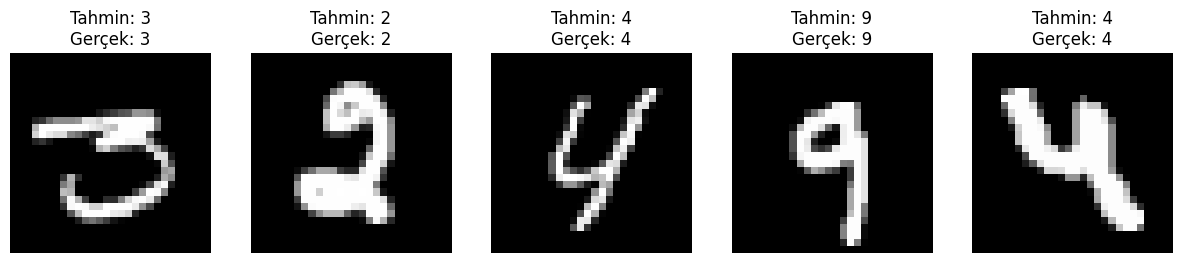

In [3]:
import numpy as np

# Rastgele 5 test örneği seç
indices = np.random.choice(range(len(X_test)), 5)
images, labels = X_test[indices], y_test[indices]

# Tahmin yap
predictions = model.predict(images)

# Sonuçları göster
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Tahmin: {np.argmax(predictions[i])}\nGerçek: {labels[i]}")
    plt.axis('off')
plt.show()

Adım 4: Modeli Kaydetme ve Yeniden Yükleme


In [5]:
# Modeli kaydet
model.save('mnist_model.keras')

# Yeniden yükle
loaded_model = tf.keras.models.load_model('mnist_model.keras')
loaded_model.evaluate(X_test, y_test)  # Test et

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9809 - loss: 0.0881


[0.06841818988323212, 0.9850999712944031]